# Credit Card Fraud Detection
Fraud can be committed in different ways and in many industries. The majority of detection methods combine a variety of fraud detection datasets to form a connected overview of both valid and non-valid payment data to make a decision.

Credit Card Fraud Detection with Machine Learning is a process of data investigation and the development of a model that will provide the best results in revealing and preventing fraudulent transactions. This is achieved through bringing together all meaningful features of card users’ transactions, such as Date, User Zone, Product Category, Amount, Provider, Client’s Behavioral Patterns, etc. The information is then run through a subtly trained model that finds patterns and rules so that it can classify whether a transaction is fraudulent or is legitimate. 

### Checking versions of packages


In [42]:
import sys
import numpy
import pandas
import matplotlib
import scipy
import seaborn
import sklearn

print('Python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('matplotlib: '.format(matplotlib.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.2
pandas: 0.24.2
matplotlib: 
scipy: 1.2.1
seaborn: 0.9.0
sklearn: 0.20.3


In [43]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### About the Credit Card Transaction data 
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

In [72]:
#loading dataset from csv file

data = pd.read_csv('creditcard.csv')

In [73]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [74]:
print(data.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.**Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

In [75]:
print(data.shape)

(284807, 31)


In [76]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Observation
The column 'Class' defines about the validity of the respective credit card transaction.
A value of '0' says that the transaction is 100% valid while
a value of '1' says that the transaction is Fraud.

As the mean value of 'Class' column is very close to zero so from the above stastistcs we can say that the number of fraudulant transactions are considerably low as compared to that of the valid transactions. 

## Histogram

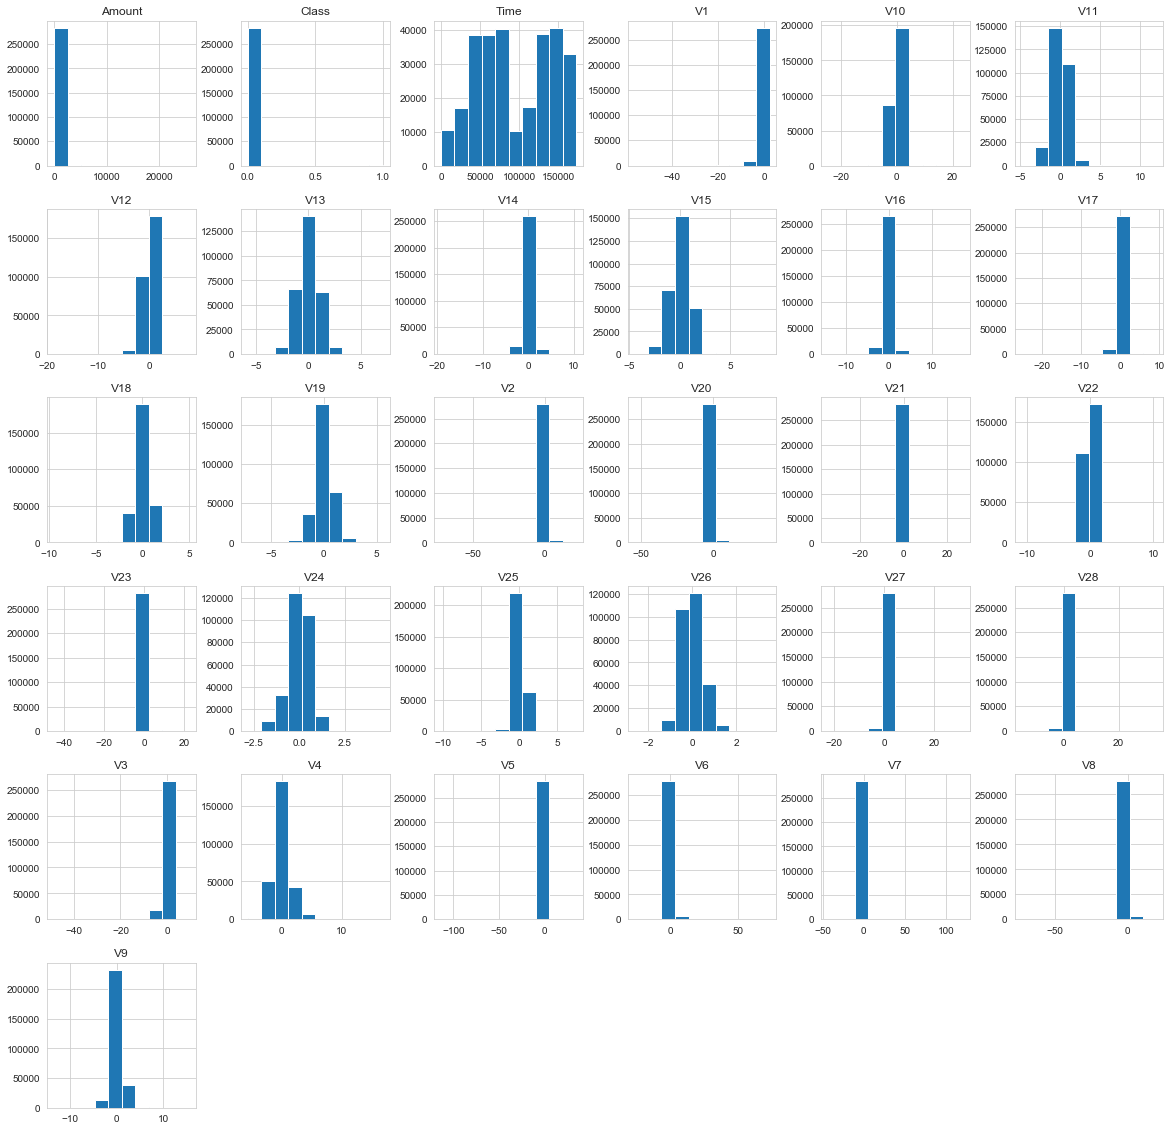

In [77]:
#Plotting histograms for each parameter
data.hist(figsize = (20,20))
plt.show()

## 2-D Scatter Plot

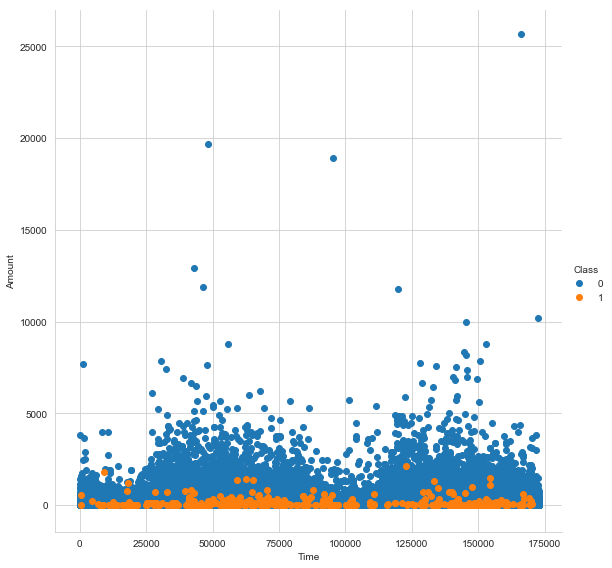

In [78]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue ="Class", height=8).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

#### Observations:
1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount less than 2500. Transactions which have transaction amount above 2500 have no fraud cases.

2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [79]:
#determining the number of fraud cases in data
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


We can see that there are only 492 fraud transactions over 284315 valid transactions.

The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.


## Correlation Matrix

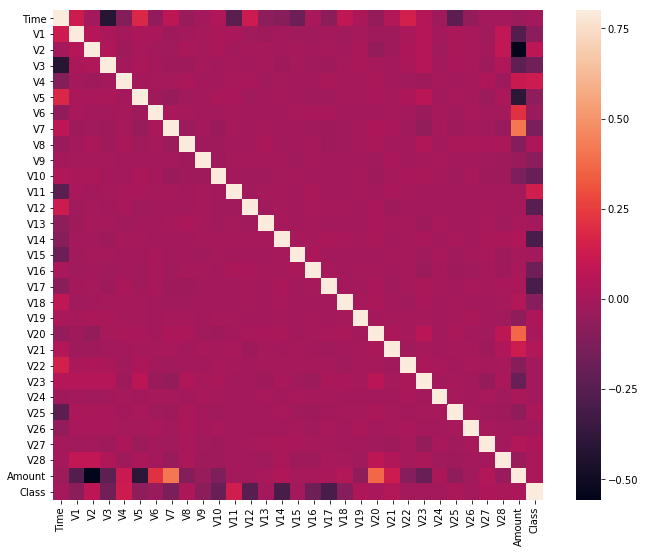

In [52]:
#Correlation matrix
CorrMat = data.corr()
flg= plt.figure(figsize= (12,9))

sns.heatmap(CorrMat, vmax = .8, square =True )
plt.show()

### Observations:
Some of the variables like V2,V5 has strong negative correlation with 'Amount'. While on the other hand there is approximately no correlation between other variables.

In [80]:
# Filtering Data

filtered_data = data[['Time','Amount', 'Class']]
filtered_data

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
5,2.0,3.67,0
6,4.0,4.99,0
7,7.0,40.80,0
8,7.0,93.20,0
9,9.0,3.68,0


## Scatter Plot Matrix

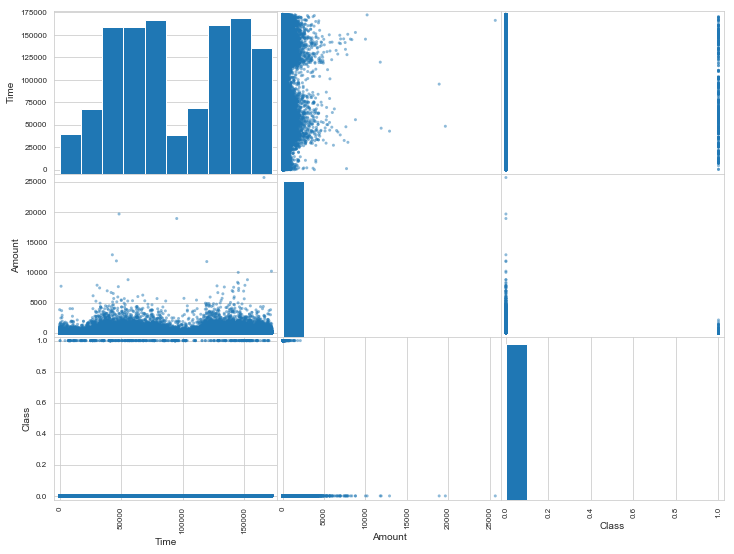

In [92]:
from pandas.plotting import scatter_matrix
scatter_matrix(filtered_data,alpha =0.5, figsize = (12,9))
plt.show()

In [87]:
#Setting values of the data to an array
array = data.values

#Storing the variable we will be predicting on
X = array[:,0:30]
Y = array[:,30]

#Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Outlier Detection Method
Here we are going to use and compare two different outlier detection algorithms namely IsolationForest and LocalOutlierFactor.

### Isolation Forest
1. Random and recursive partition of data is carried out, which is represented as a tree (random forest). This is the training stage where the user defines the parameters of the subsample and the number of trees. The author (Liu and Ting, 2008) suggest the default value of 256 for sub sample and 100 trees. The convergence is reached as the number of tree increases. However, fine tuning may be required on the case basis.


2. The end of the tree is reached once the recursive partition of data is finished. It is expected that the distance taken to reach the outlier is far less than that for the normal data (see the figure).

### Local Outlier Factor
1. The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.


2. The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

IsolationForest is only sensitive to global outliers, and is weak in dealing with local outliers. Although LocalOutlierFactor performs well in local outlier detection, but it has high time complexity. So here I will try to compare the performance of both these algorithms over this Credit Card dataset.

In [88]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define oulier detection methods
#defining a dictionary called classifiers

classifiers={
    "Isolation Forest": IsolationForest(max_samples=len(X), contamination = outlier_fraction, random_state=1, behaviour ="new"),
    
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors =20, contamination=  outlier_fraction)
}

## Fitting Model
IsolationForest vs LocalOutlierFactor


 

In [89]:
# Fit the Model
num_outliers = len(Fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)     #it will fit the data X and predict the label class values
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # As the y_pred value will give us -1 for an oulier and 1 for an inlier
    # Reshape the prediction
    y_pred[y_pred==1] =0
    y_pred[y_pred==-1]=1
    
    n_errors= (y_pred !=Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))
    

Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284315
         1.0       0.34      0.35      0.35       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284315
         1.0       0.05      0.05      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



## Fitted Model Report

Both the algorithms have good accuracy score of above 99.5%. The accuracy result of both the algorithms are considered to be very good and approximately close to each other.

The number of errors in Isolation Forest algorithm = 645

The number of errors in LocalOutlierFactor algorithm = 935

If we look at the classification report of both the algorithms it depicts that the precision of predicting valid credit card transaction is 1 in both the cases, but the precision for fraud transaction in IsolationForest is 0.34 and that of LocalOutlierFactor is 0.05 which is considered to be very low. It clearly shows that from the precision score that we got very few actual fraudulant cases that are getting labeled as fraudulant cases.

Precision accounts for false positive cases and recall accounts for false negative cases, both of them are not good for the model prediction result.

It summarises that the overall performance of IsolationForest is better than that of the LocalOutlierFator. In IsolationForest algorithm we are actually identifying approx 35% of the actual fraud transactions, it has a lot of false positive and false negative cases. 

